# **Métodos Computacionales**
 **Taller 1**
 
 **Estudiantes**: Juan C. Rojas V. (202214037) & Esteban Parra C. (????????)

## **Ejercicio 2.01.1: Factoriales**
Escriba una función que calcule el factorial de $n$, con $n \in \mathbb{N}$. 

$$n! = n(n − 1)(n − 2) \dots 1 $$
Calcule los primeros 20 números factoriales.

In [1]:
def factorial(n:int) -> int:
    """
    La función recibe como parámetro un número entero n y devuelve un número entero, 
    siendo este el factorial del número ingresado.

    Args:
        n (int): Número entero al que se quiere operar.

    Returns:
        int: Factorial del número ingresado.
    """
    fact = n
    while n > 1:
        fact *= n-1
        n -= 1
        
    return fact

        

In [2]:
#Requerimiento de los primero 20 números factoriales.

for i in range(1,21):
    print("El factorial de %s es %s"%(i,factorial(i)))

El factorial de 1 es 1
El factorial de 2 es 2
El factorial de 3 es 6
El factorial de 4 es 24
El factorial de 5 es 120
El factorial de 6 es 720
El factorial de 7 es 5040
El factorial de 8 es 40320
El factorial de 9 es 362880
El factorial de 10 es 3628800
El factorial de 11 es 39916800
El factorial de 12 es 479001600
El factorial de 13 es 6227020800
El factorial de 14 es 87178291200
El factorial de 15 es 1307674368000
El factorial de 16 es 20922789888000
El factorial de 17 es 355687428096000
El factorial de 18 es 6402373705728000
El factorial de 19 es 121645100408832000
El factorial de 20 es 2432902008176640000


## **Ejercicio 2.02: Máximos**

Descargar los datos de: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt Y diseñar un algoritmo
para encontrar todos los máximos locales en esta serie de datos.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
datafile = open("data/EstrellaEspectro.txt",'r')

x = []
y = []



while True:
    a = datafile.readline()
    if not a == '':
        a = a.split("  ")
        x.append(float(a[0]))
        y.append(float(a[1]))
    else:
        break


Si se quiere verificar que un valor $x_i \in \{ x_0, x_1, \dots x_n\}$ dé como salida un máximo de una función $f(x_i)$ se debe comprobar que $$\frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}} > 0$$ y $$\frac{f(x_{i+1}) - f(x_{i})}{x_{i+1} - x_{i}} < 0$$

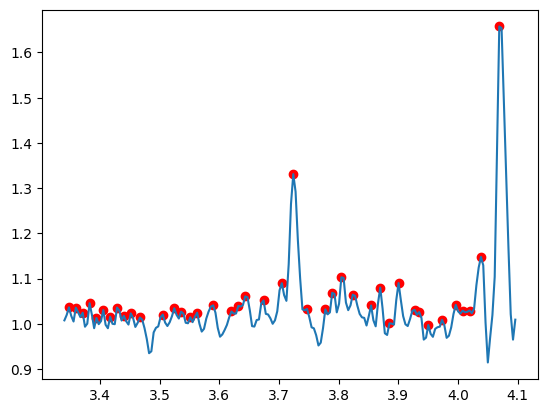

In [4]:
def VerifyMax(x:list,y:list) :
    """
    La función tiene como entrada dos listas con los valores de espectro de una estrella y retorna una lista de tuplas,
    siendo estas las posiciones de los puntos máximos.

    Args:
        x (list): Valores de espectro
        y (list): Valores de intensidad

    Returns:
        list: Lista de tuplas con los máximos locales de los datos.
    """
    
    xmax_points = []
    ymax_points = []
    
    for i in range(2, len(x)-1):
        left_handed_slope = (y[i]-y[i-1])/(x[i] - x[i-1])
        right_handed_slope = (y[i+1]-y[i])/(x[i+1] - x[i])
        if right_handed_slope < 0 and left_handed_slope > 0:
            xmax_points.append(x[i])
            ymax_points.append(y[i])
        
    return xmax_points, ymax_points

x_max,y_max = VerifyMax(x,y) 

plt.plot(x,y)
plt.scatter(x_max,y_max,color="red")




## **Ejercicio 2.03: Sucesión de Fibonacci**

1. La sucesión de Fibonacci está definida por la siguiente definición recurrente: 
$$ \begin{gather*}
f_0 = 0 \\
f_1 = 1 \\
f_n = f_{n-1} + f_{n-2}

\end{gather*} $$

Encuentre los primeros 20 términos de la sucesión.

In [11]:
fibo_sequence = [0,1]
for i in range(2,21):
    fibo_sequence.append(fibo_sequence[i-1] + fibo_sequence[i-2])
    
fibo_sequence

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765]

2. Graficar la sucesión de Fibonacci

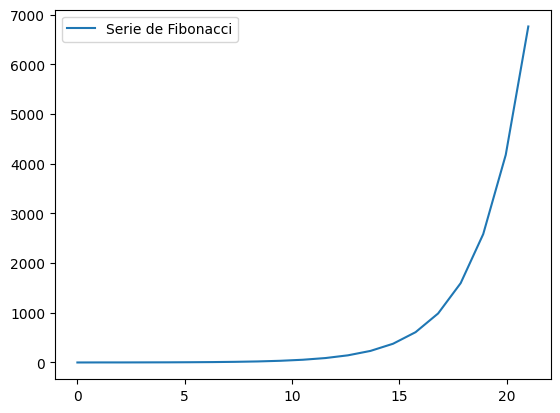

In [32]:
plt.plot(np.linspace(0,21,21),fibo_sequence)
plt.legend(["Serie de Fibonacci"])

3. El número aureo está dado por: $$\varphi = \frac{1+\sqrt{5}}{2} $$
La sucesión de Fibonacci se relaciona con este número de la siguiente forma: $$\varphi = \lim_{n\to\infty}\frac{f_{n+1}}{f_n} $$
Usando la sucesión de números de Fibonacci, calcular el número aureo y compararlo con el valor exacto.

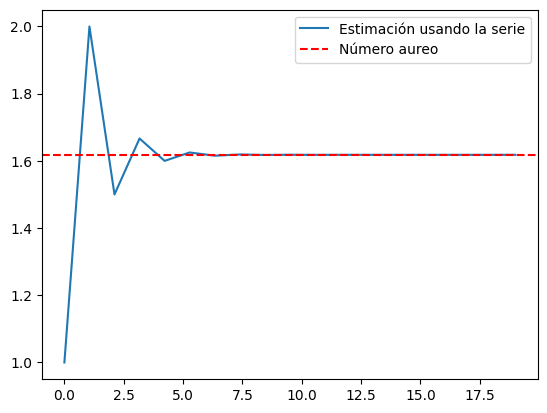

In [31]:
real_phi = (1+np.sqrt(5))/2

phi_stimation = []

for i in range(2,21):
    phi_stimation.append(fibo_sequence[i]/fibo_sequence[i-1])
    
plt.plot(np.linspace(0,19,19),phi_stimation)
plt.axhline(y=real_phi,color='r',ls='--')
plt.legend(["Estimación usando la serie","Número aureo"])

## **Ejercicio 3.10.3: Raíces de un polinomio**

Calcular **todas** las raíces reales de:
$$f(x) = 3x^5 +5x^4 -x^3$$

In [34]:
# Usando el método de bisección

epsilon = 1.0e-6
"""
TODO:No estoy muy seguro de si se puede poner la derivada
    directamente o hay que calcularla directamente.
"""
def function(x):
    return 3*x**5 + 5*x**4-x**3

def function_prime(x):
    return 15*x**4 + 20*x**3-3*x**2 

